In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import healpy as hp
import os
import matplotlib.pyplot as plt

data_directory = "/mnt/lustre/scratch/nlsas/home/csic/eoy/ioj/CMBFeatureNet/data/"
os.chdir(data_directory)
print("Current working directory:", os.getcwd())

Current working directory: /mnt/lustre/scratch/nlsas/home/csic/eoy/ioj/CMBFeatureNet/data


Filename: ./simulated_maps/lcdm/cmb_map_0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  xtension      1 BinTableHDU     18   12288R x 1C   [1024D]   
ColDefs(
    name = 'T'; format = '1024D'
)
NSIDE: 1024


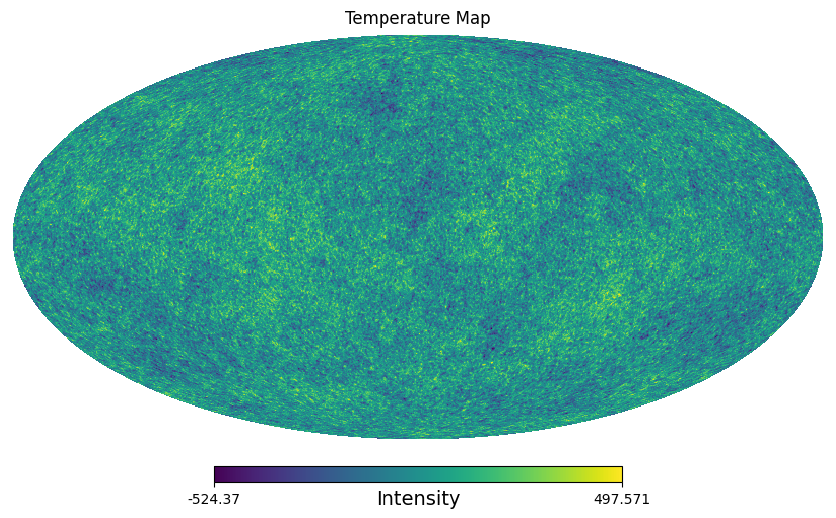

In [7]:
#Read the data
from CMBFeatureNet import read_map
test_path = "./simulated_maps/lcdm/"
map_temp_data = read_map(test_path + 'cmb_map_0.fits')

#Visualize the map
nside = hp.npix2nside(len(map_temp_data))
print(f"NSIDE: {nside}")

#Plot
hp.mollview(map_temp_data, title="Temperature Map", unit="Intensity")
plt.show()

In [ ]:
#Load hp maps
def load_map(filename):
    data = hp.read_map(filename)
    data = torch.tensor(data, dtype=torch.float32).unsqueeze(0)  #batch, channels, pixels
    return data

#Build the graph for the hp map
def build_healpix_graph(nside):
    npix = hp.nside2npix(nside)
    return healpy_graph.healpy_graph(nside, k=8)

#Define layers outside of a class
def create_model_layers(graph, n_classes=2):
    conv1 = models.GconvS2(graph, Fin=1, Fout=16, K=5)
    conv2 = models.GconvS2(graph, Fin=16, Fout=32, K=5)
    conv3 = models.GconvS2(graph, Fin=32, Fout=64, K=5)

    fc1 = nn.Linear(64, 32)
    fc2 = nn.Linear(32, n_classes)

    return conv1, conv2, conv3, fc1, fc2

#Define the forward pass manually
def forward_pass(x, conv1, conv2, conv3, fc1, fc2):
    x = F.relu(conv1(x))
    x = F.relu(conv2(x))
    x = F.relu(conv3(x))
    x = torch.mean(x, dim=1)  #Global average pooling over pixels
    x = F.relu(fc1(x))
    x = fc2(x)
    return x

#Example usage
if __name__ == "__main__":
    nside = 32
    n_classes = 2

    graph = build_healpix_graph(nside)

    conv1, conv2, conv3, fc1, fc2 = create_model_layers(graph, n_classes)

    filename = "your_map.fits"
    x = load_map(filename)

    #Forward pass
    output = forward_pass(x, conv1, conv2, conv3, fc1, fc2)
    print("Model output:", output)